<a href="https://colab.research.google.com/github/BOMBBAAM/senior-chula-tla-optim/blob/main/demo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as  np

In [48]:
np.__version__

'1.23.5'

# Formulate the probability vector

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Problem
n = 20
before = np.random.rand(n)
after = np.random.rand(n) * before
# before = np.array([0.5, 0.7, 0.4, 0.45, 0.8, 0.3, 0.2, 0.3, 0.1, 0.25,0.7,0.5,0.35,0.45,0.7,0.5,0.6,0.2,0.3,0.5])
# after = 0.5*before

# Difference of before and after
diff = before - after
diff.shape

(20,)

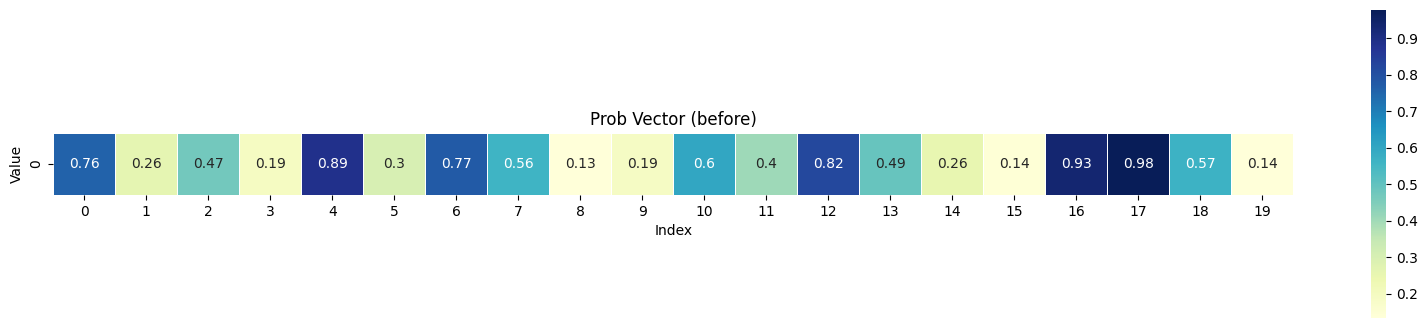

In [50]:
plt.figure(figsize=(20, 4))
sns.heatmap(before.reshape(1,-1), cmap="YlGnBu", annot=True, cbar=True, linewidths=0.5, square=True)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Prob Vector (before)")
plt.show()

# Diff Vector

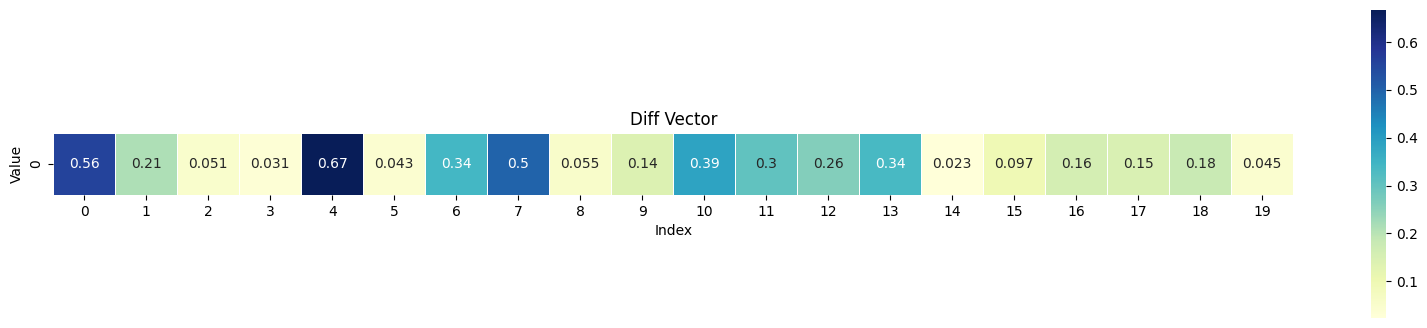

In [51]:
plt.figure(figsize=(20, 4))
sns.heatmap(diff.reshape(1,-1), cmap="YlGnBu", annot=True, cbar=True, linewidths=0.5, square=True)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Diff Vector")
plt.show()

# Naive Algorithm (All TLA are sticked)

In [52]:
def max_diff(array, k):

    n = len(array)
    if n < k:
        return 0

    max_mean = 0
    max_array = []

    for i in range(n - k):
        for j in range(i + k, n + k):
            subarray = array[i:j]
            iter_mean = np.mean(subarray)
            if iter_mean > max_mean:
                max_array = []
                max_mean = iter_mean
            if np.mean(subarray) >= max_mean:
                max_array.append([i,k,list(subarray)])
                max_mean = iter_mean

    return max_mean, max_array

In [53]:
for k in range(3,10):
    max_mean, max_windows = max_diff(diff, k)
    print(k)
    print(f"Maximum combined mean: {max_mean}")
    print(f"Position: {max_windows[0][0]}, Right consecutive:{max_windows[0][1]}")
    print(f"Window: {max_windows[0][2]}")
    print('-'*50)

3
Maximum combined mean: 0.38688598560806864
Position: 4, Right consecutive:3
Window: [0.6668877285885967, 0.043085383551445366, 0.34079214754981035, 0.49677868274242215]
--------------------------------------------------
4
Maximum combined mean: 0.38688598560806864
Position: 4, Right consecutive:4
Window: [0.6668877285885967, 0.043085383551445366, 0.34079214754981035, 0.49677868274242215]
--------------------------------------------------
5
Maximum combined mean: 0.3205853580174567
Position: 4, Right consecutive:5
Window: [0.6668877285885967, 0.043085383551445366, 0.34079214754981035, 0.49677868274242215, 0.05538284765500885]
--------------------------------------------------
6
Maximum combined mean: 0.30440245365367496
Position: 4, Right consecutive:6
Window: [0.6668877285885967, 0.043085383551445366, 0.34079214754981035, 0.49677868274242215, 0.05538284765500885, 0.1409957947659227, 0.3868945907225186]
--------------------------------------------------
7
Maximum combined mean: 0.3044

# Separated window algorithm

In [54]:
def max_combined_window(array, k):
    n = len(array)
    if n < k:
        return 0, []

    max_mean = 0
    max_windows = []

    for left_size in range(1, k):
        right_size = k - left_size

        if left_size > n or right_size > n:
            continue

        left_window = array[:left_size]
        right_window = array[-right_size:]

        left_mean = np.mean(left_window)
        right_mean = np.mean(right_window)

        combined_mean = (left_mean * left_size + right_mean * right_size) / k

        if combined_mean > max_mean:
            max_mean = combined_mean
            max_windows = [list(left_window), list(right_window)]

    return max_mean, max_windows

In [55]:
for k in range(3,10):
    max_mean, max_windows = max_combined_window(diff, k)
    print(k)
    print(f"Maximum combined mean: {max_mean}")
    print(f"Left Window: {max_windows[0]}")
    print(f"Right Window: {max_windows[1]}")
    print('-'*50)

3
Maximum combined mean: 0.27163504441954806
Left Window: [0.5574351577979533, 0.2126896598861172]
Right Window: [0.04478031557457364]
--------------------------------------------------
4
Maximum combined mean: 0.24860450503708886
Left Window: [0.5574351577979533, 0.2126896598861172]
Right Window: [0.1795128868897114, 0.04478031557457364]
--------------------------------------------------
5
Maximum combined mean: 0.22854367108962853
Left Window: [0.5574351577979533, 0.2126896598861172]
Right Window: [0.14830033529978714, 0.1795128868897114, 0.04478031557457364]
--------------------------------------------------
6
Maximum combined mean: 0.2606153110427764
Left Window: [0.5574351577979533, 0.2126896598861172, 0.05078921318912816, 0.03110979122028984, 0.6668877285885967]
Right Window: [0.04478031557457364]
--------------------------------------------------
7
Maximum combined mean: 0.2490292504494814
Left Window: [0.5574351577979533, 0.2126896598861172, 0.05078921318912816, 0.0311097912202